In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('restaurant-data.csv')

# Part 1: Data Preprocessing 

In [3]:
df.head()

,uid,transactionstarttimeutc,transactionnumber,timestamputc,coursename,coursenumber,coursestarttimeutc,itemcooktime,itemdescription,itemid,itemquantity,itemnumber,parentitemnumber
0,a7bc615a-d5f2-4fe9-afa1-30435898474e,27:02.5,1,28:34.0,ENTREES,1,27:02.5,899,Route Test,4919,1,1,0
1,d5f8e086-81a8-4be9-ad51-28ac6ea3a068,00:00.5,9999,00:06.0,APPETIZERS,15,00:01.6,899,*Please Wash Hands,4919,1,1,0
2,3b73f5b0-2063-4163-a11d-58b8c7d190d9,00:00.5,9999,00:17.3,APPETIZERS,15,00:01.6,899,*Please Wash Hands,4919,1,1,0
3,d94f0fec-10d5-49f5-9bdc-b5390bb474e8,00:00.5,9999,00:21.9,APPETIZERS,15,00:01.6,899,*Please Wash Hands,4919,1,1,0
4,a680cf4f-35a5-4a9f-8dd8-59a7aa71e387,00:00.5,9999,00:38.0,APPETIZERS,15,00:01.6,899,*Please Wash Hands,4919,1,1,0


In [4]:
df.shape

(128162, 13)

In [5]:
df.dtypes

uid                        object
transactionstarttimeutc    object
transactionnumber           int64
timestamputc               object
coursename                 object
coursenumber                int64
coursestarttimeutc         object
itemcooktime                int64
itemdescription            object
itemid                      int64
itemquantity                int64
itemnumber                  int64
parentitemnumber            int64
dtype: object

In [6]:
df.columns

Index(['uid', 'transactionstarttimeutc', 'transactionnumber', 'timestamputc',
       'coursename', 'coursenumber', 'coursestarttimeutc', 'itemcooktime',
       'itemdescription', 'itemid', 'itemquantity', 'itemnumber',
       'parentitemnumber'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128162 entries, 0 to 128161
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   uid                      128162 non-null  object
 1   transactionstarttimeutc  128162 non-null  object
 2   transactionnumber        128162 non-null  int64 
 3   timestamputc             128162 non-null  object
 4   coursename               128162 non-null  object
 5   coursenumber             128162 non-null  int64 
 6   coursestarttimeutc       128162 non-null  object
 7   itemcooktime             128162 non-null  int64 
 8   itemdescription          128162 non-null  object
 9   itemid                   128162 non-null  int64 
 10  itemquantity             128162 non-null  int64 
 11  itemnumber               128162 non-null  int64 
 12  parentitemnumber         128162 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 12.7+ MB


In [8]:
df.describe()

,transactionnumber,coursenumber,itemcooktime,itemid,itemquantity,itemnumber,parentitemnumber
count,128162.000000,128162.000000,128162.000000,128162.000000,128162.000000,128162.000000,128162.000000
mean,797.973814,2.711506,288.499376,3238.499157,0.997901,5.640198,2.522347
std,1898.892352,3.136632,331.407268,1971.101143,0.045766,5.117899,4.328067
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,188.000000,1.000000,1.000000,1502.000000,1.000000,2.000000,0.000000
50%,423.000000,2.000000,1.000000,2940.000000,1.000000,4.000000,1.000000
75%,636.000000,3.000000,577.000000,4919.000000,1.000000,8.000000,3.000000
max,9999.000000,31.000000,1150.000000,14932.000000,1.000000,73.000000,69.000000


## In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [9]:
df.shape

(128162, 13)

In [10]:
#Identify Missing Values

In [11]:
df.isnull().sum()

uid                        0
transactionstarttimeutc    0
transactionnumber          0
timestamputc               0
coursename                 0
coursenumber               0
coursestarttimeutc         0
itemcooktime               0
itemdescription            0
itemid                     0
itemquantity               0
itemnumber                 0
parentitemnumber           0
dtype: int64

In [12]:
#Check for Missing Values in Specific Columns:

In [13]:
# Check for missing values in specific columns
missing_values_specific = df[['uid', 'transactionstarttimeutc', 'transactionnumber', 'timestamputc',
       'coursename', 'coursenumber', 'coursestarttimeutc', 'itemcooktime',
       'itemdescription', 'itemid', 'itemquantity', 'itemnumber',
       'parentitemnumber']].isnull().sum()
print(missing_values_specific)


uid                        0
transactionstarttimeutc    0
transactionnumber          0
timestamputc               0
coursename                 0
coursenumber               0
coursestarttimeutc         0
itemcooktime               0
itemdescription            0
itemid                     0
itemquantity               0
itemnumber                 0
parentitemnumber           0
dtype: int64


In [14]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

<Axes: >

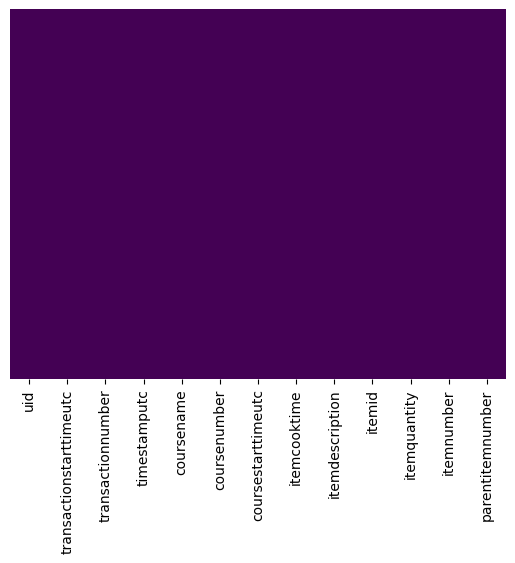

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#Check for Duplicates

In [16]:
df.duplicated().sum()

39

In [17]:
print(df.duplicated().sum())

39


In [18]:
#Identify Anomalies

In [19]:
df.describe()

,transactionnumber,coursenumber,itemcooktime,itemid,itemquantity,itemnumber,parentitemnumber
count,128162.000000,128162.000000,128162.000000,128162.000000,128162.000000,128162.000000,128162.000000
mean,797.973814,2.711506,288.499376,3238.499157,0.997901,5.640198,2.522347
std,1898.892352,3.136632,331.407268,1971.101143,0.045766,5.117899,4.328067
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,188.000000,1.000000,1.000000,1502.000000,1.000000,2.000000,0.000000
50%,423.000000,2.000000,1.000000,2940.000000,1.000000,4.000000,1.000000
75%,636.000000,3.000000,577.000000,4919.000000,1.000000,8.000000,3.000000
max,9999.000000,31.000000,1150.000000,14932.000000,1.000000,73.000000,69.000000


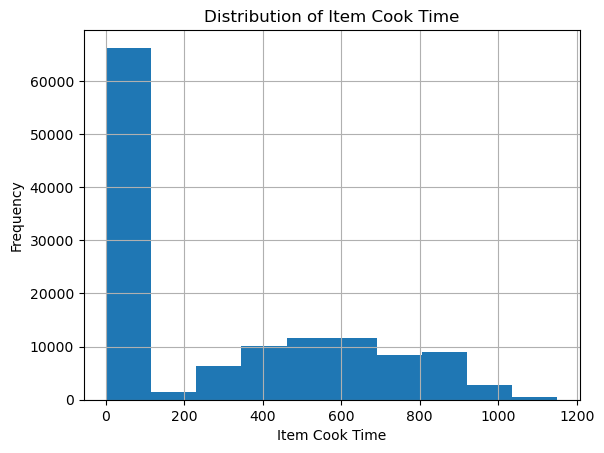

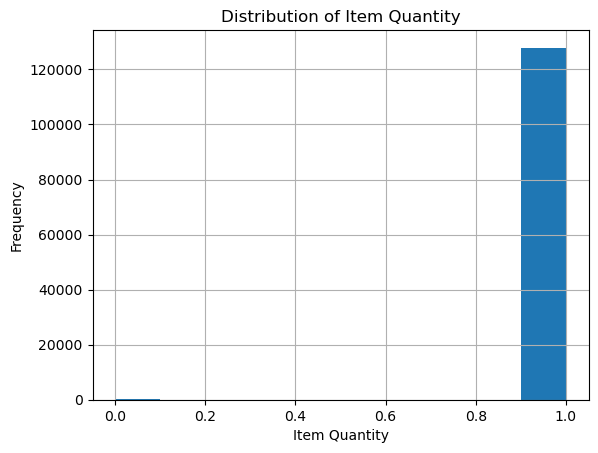

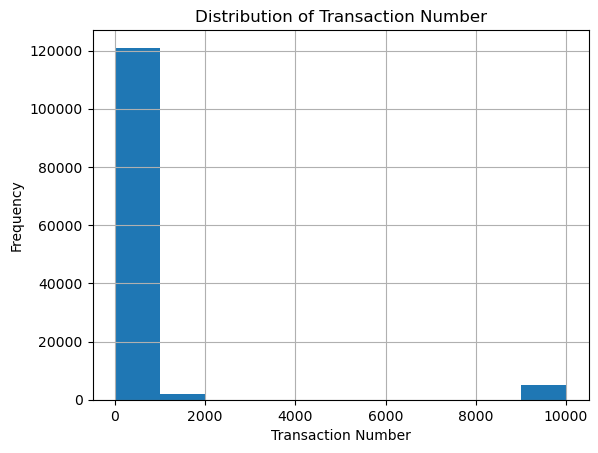

In [20]:
# Histogram for itemcooktime
df['itemcooktime'].hist()
plt.title('Distribution of Item Cook Time')
plt.xlabel('Item Cook Time')
plt.ylabel('Frequency')
plt.show()

# Histogram for itemquantity
df['itemquantity'].hist()
plt.title('Distribution of Item Quantity')
plt.xlabel('Item Quantity')
plt.ylabel('Frequency')
plt.show()

# For other columns if needed
df['transactionnumber'].hist()
plt.title('Distribution of Transaction Number')
plt.xlabel('Transaction Number')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

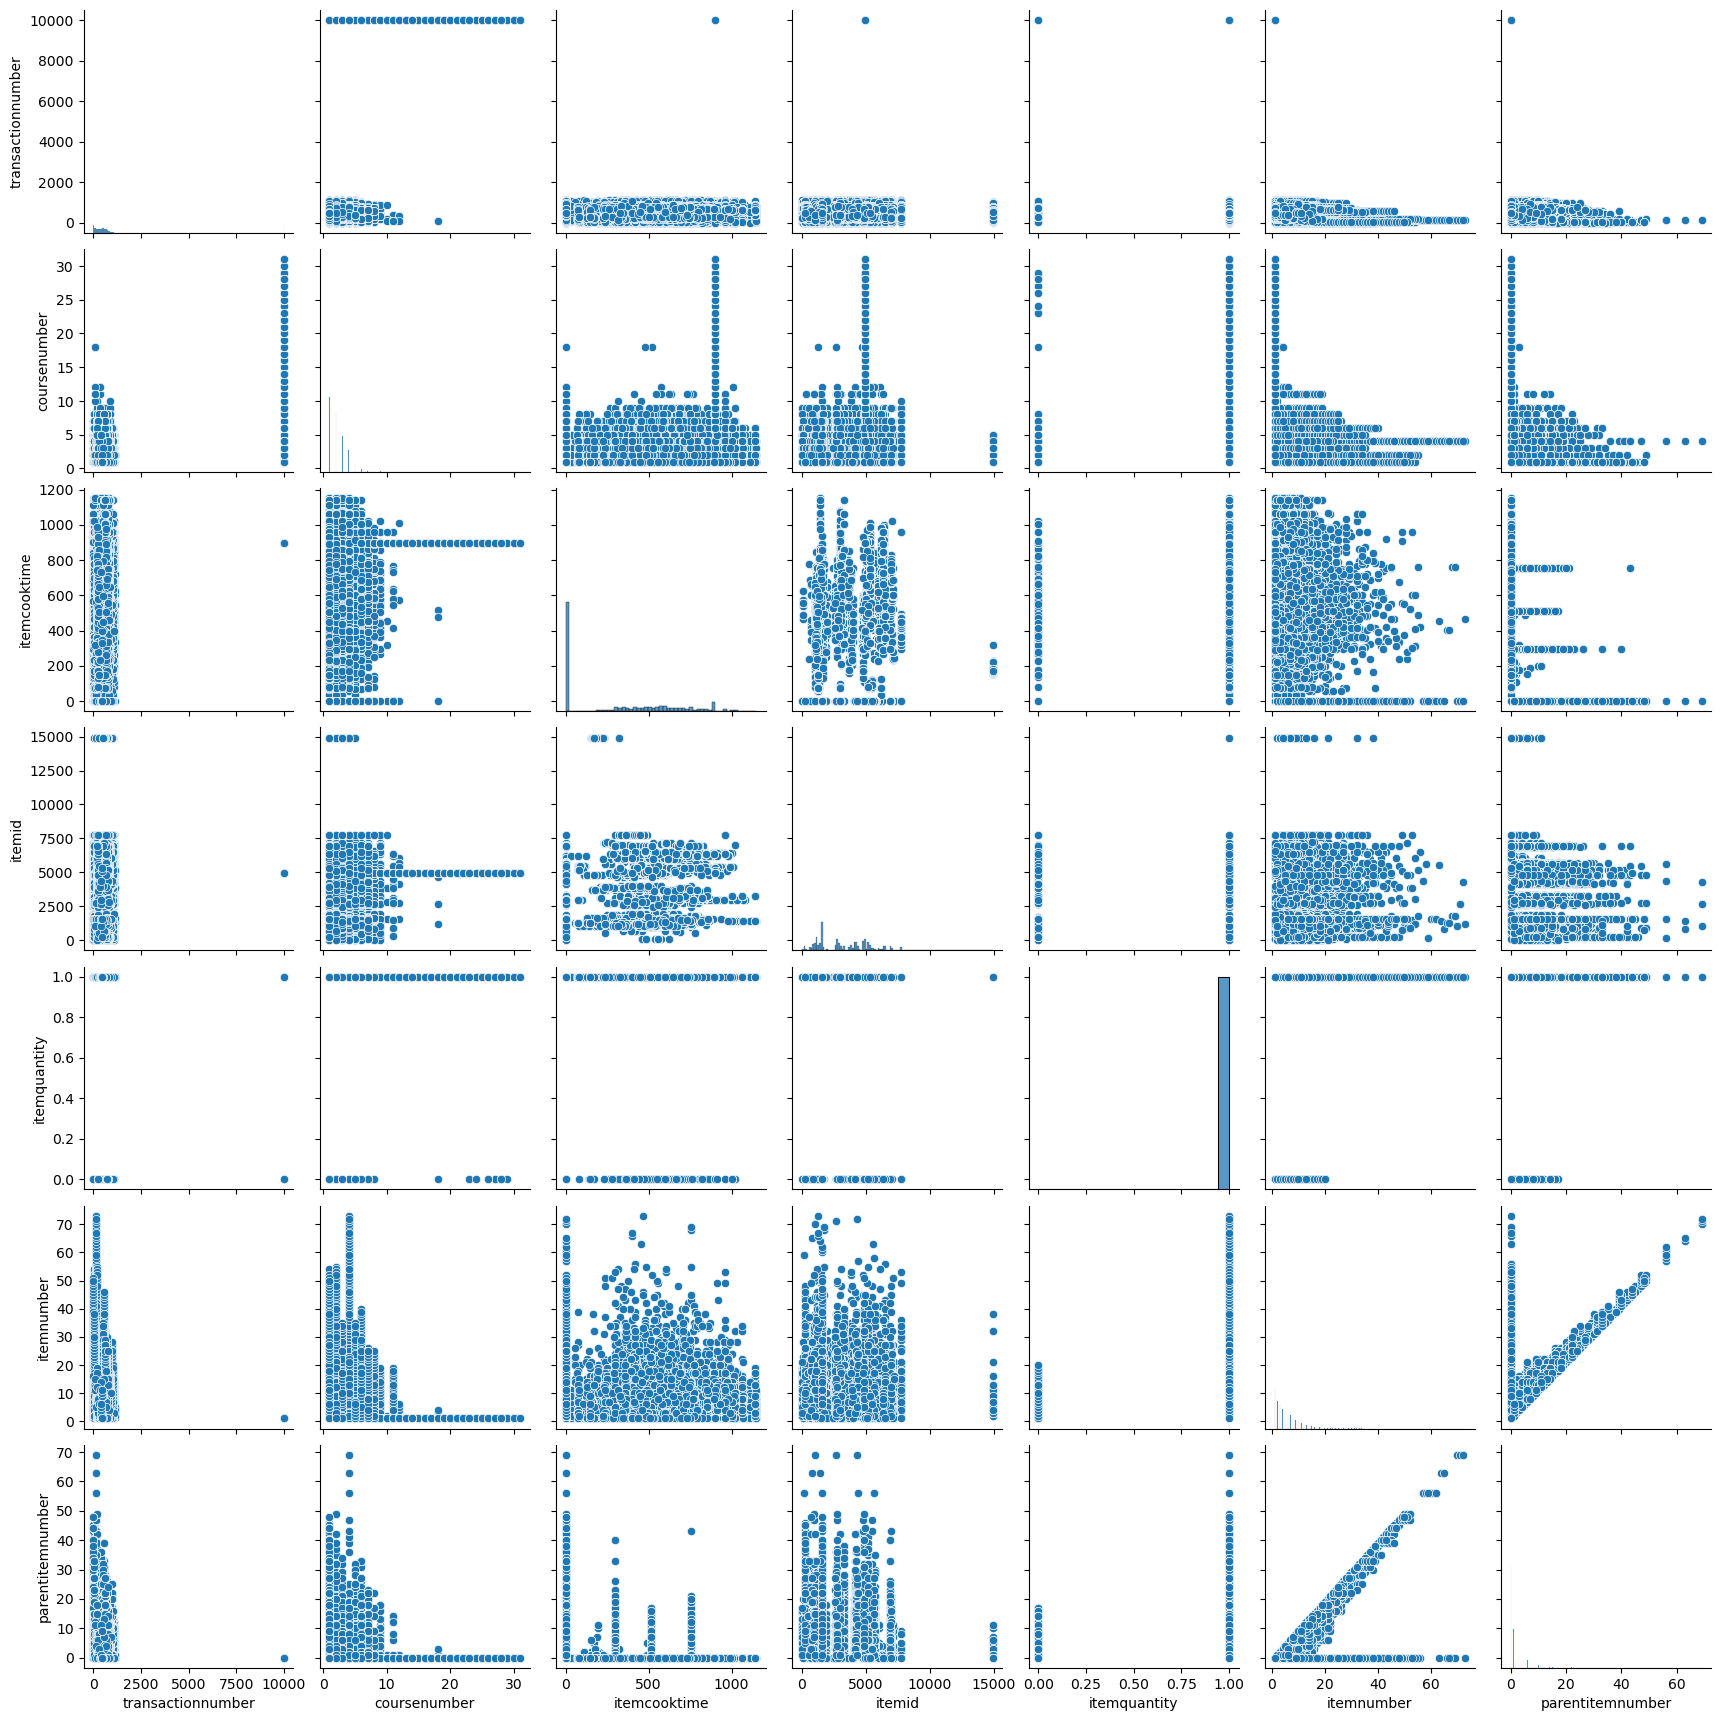

In [22]:
# Pairplot for numerical columns
numerical_cols = ['transactionnumber', 'coursenumber', 'itemcooktime', 'itemid', 'itemquantity', 'itemnumber', 'parentitemnumber']
sns.pairplot(df[numerical_cols])
plt.show()


In [23]:
# Check for any missing values
print(df[numerical_cols].isna().sum())

transactionnumber    0
coursenumber         0
itemcooktime         0
itemid               0
itemquantity         0
itemnumber           0
parentitemnumber     0
dtype: int64


In [24]:
# pip install --upgrade pandas seaborn

In [25]:
# Check for duplicate rows

In [26]:
duplicate_rows = df.duplicated()  # Returns a boolean Series
num_duplicates = duplicate_rows.sum()
print(f'Total duplicate rows: {num_duplicates}')

Total duplicate rows: 39


In [27]:
# Check for duplicates based on specific columns

In [28]:
duplicate_rows_based_on_cols = df.duplicated(subset=['uid', 'transactionstarttimeutc', 'transactionnumber', 'timestamputc',
       'coursename', 'coursenumber', 'coursestarttimeutc', 'itemcooktime',
       'itemdescription', 'itemid', 'itemquantity', 'itemnumber',
       'parentitemnumber'])
num_duplicates_based_on_cols = duplicate_rows_based_on_cols.sum()
print(f'Total duplicate rows based on specified columns: {num_duplicates_based_on_cols}')


Total duplicate rows based on specified columns: 39


In [29]:
# Assess the Duplicates


In [30]:
# View duplicate rows
duplicate_rows_df = df[duplicate_rows]
print(duplicate_rows_df)

                                         uid transactionstarttimeutc  \
82640   c8be4581-889a-42d4-9e4d-556ca911af9f                 40:34.7   
82642   e5b7d297-64d8-4fa0-9799-713cfb06e7ff                 40:34.7   
82644   06eafb4c-8363-40e9-a03b-71aa528e7b40                 50:37.3   
82646   3b8a9a39-00b7-4a22-be95-7fc99d3bfd7b                 50:45.4   
82648   728bc535-7dff-43b7-9e3e-647deda812f9                 54:22.8   
82650   31552322-097a-41bb-ad61-d149982dc2a5                 54:22.8   
82652   a04ebfd6-c387-46ea-b35a-ebbd06ec6b37                 48:07.6   
82654   624d65bb-6420-4c9e-8025-8e7d1fb53f71                 48:07.6   
82656   17624fe9-a10b-4a6e-a7ff-4ddf9901f20a                 56:10.5   
82658   ea327e06-0b5b-4b6f-98fb-e5586ea033c8                 56:10.5   
82660   63dfefa1-2fb2-492a-ab99-41b405d8a13e                 56:10.5   
82662   b0d9b583-995d-4422-a8c4-7ee75b4ce6b7                 56:10.5   
82664   26ceec66-e82f-4762-8ab3-7bfab7f2748b                 56:

In [31]:
#Resolve Duplicate Values

In [32]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

In [33]:
#Remove Duplicates Based on Specific Columns

In [34]:
# Remove duplicates based on specific columns, keeping the first occurrence
df_cleaned = df.drop_duplicates(subset=['uid', 'transactionstarttimeutc', 'transactionnumber', 'timestamputc',
       'coursename', 'coursenumber', 'coursestarttimeutc', 'itemcooktime',
       'itemdescription', 'itemid', 'itemquantity', 'itemnumber',
       'parentitemnumber'], keep='first')


# New data frame name is df_cleaned

In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128123 entries, 0 to 128161
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   uid                      128123 non-null  object
 1   transactionstarttimeutc  128123 non-null  object
 2   transactionnumber        128123 non-null  int64 
 3   timestamputc             128123 non-null  object
 4   coursename               128123 non-null  object
 5   coursenumber             128123 non-null  int64 
 6   coursestarttimeutc       128123 non-null  object
 7   itemcooktime             128123 non-null  int64 
 8   itemdescription          128123 non-null  object
 9   itemid                   128123 non-null  int64 
 10  itemquantity             128123 non-null  int64 
 11  itemnumber               128123 non-null  int64 
 12  parentitemnumber         128123 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 13.7+ MB


In [36]:
df_cleaned.shape

(128123, 13)

In [37]:
df_cleaned.isnull().sum()

uid                        0
transactionstarttimeutc    0
transactionnumber          0
timestamputc               0
coursename                 0
coursenumber               0
coursestarttimeutc         0
itemcooktime               0
itemdescription            0
itemid                     0
itemquantity               0
itemnumber                 0
parentitemnumber           0
dtype: int64

In [38]:
duplicate_rows = df_cleaned.duplicated()  # Returns a boolean Series
num_duplicates = duplicate_rows.sum()
print(f'Total duplicate rows: {num_duplicates}')

Total duplicate rows: 0


# Part 2: Exploratory Data Analysis (EDA)

## Plot the Time Series of Daily Item Sales

In [39]:
# import datetime
from datetime import datetime


## 1 : Verify Column Names

In [40]:
# Display column names
print(df_cleaned.columns)


Index(['uid', 'transactionstarttimeutc', 'transactionnumber', 'timestamputc',
       'coursename', 'coursenumber', 'coursestarttimeutc', 'itemcooktime',
       'itemdescription', 'itemid', 'itemquantity', 'itemnumber',
       'parentitemnumber'],
      dtype='object')


## 2. Inspect the DataFrame

In [41]:
# Display the first few rows of the DataFrame
print(df_cleaned.head())


                                    uid transactionstarttimeutc  \
0  a7bc615a-d5f2-4fe9-afa1-30435898474e                 27:02.5   
1  d5f8e086-81a8-4be9-ad51-28ac6ea3a068                 00:00.5   
2  3b73f5b0-2063-4163-a11d-58b8c7d190d9                 00:00.5   
3  d94f0fec-10d5-49f5-9bdc-b5390bb474e8                 00:00.5   
4  a680cf4f-35a5-4a9f-8dd8-59a7aa71e387                 00:00.5   

   transactionnumber timestamputc  coursename  coursenumber  \
0                  1      28:34.0     ENTREES             1   
1               9999      00:06.0  APPETIZERS            15   
2               9999      00:17.3  APPETIZERS            15   
3               9999      00:21.9  APPETIZERS            15   
4               9999      00:38.0  APPETIZERS            15   

  coursestarttimeutc  itemcooktime     itemdescription  itemid  itemquantity  \
0            27:02.5           899          Route Test    4919             1   
1            00:01.6           899  *Please Wash Hands    

## 3. Check for Index Misuse

In [42]:
# Display the DataFrame's index
print(df_cleaned.index)


Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       128152, 128153, 128154, 128155, 128156, 128157, 128158, 128159, 128160,
       128161],
      dtype='int64', length=128123)


## 4. Adjust Column Reference

In [43]:
# If 'timestamputc' is actually the index, convert it to a column
df_cleaned = df_cleaned.reset_index()
print(df_cleaned.columns)  # Verify the columns again


Index(['index', 'uid', 'transactionstarttimeutc', 'transactionnumber',
       'timestamputc', 'coursename', 'coursenumber', 'coursestarttimeutc',
       'itemcooktime', 'itemdescription', 'itemid', 'itemquantity',
       'itemnumber', 'parentitemnumber'],
      dtype='object')


## 5. Perform Operations Based on Index or Column

In [44]:
# Convert the column to string type
df_cleaned['timestamputc'] = df_cleaned['timestamputc'].astype(str)

# Display rows where 'timestamputc' might be problematic
invalid_dates = df_cleaned[~df_cleaned['timestamputc'].str.match(r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$')]
print(invalid_dates)

# Clean invalid timestamp entries
df_cleaned['timestamputc'] = df_cleaned['timestamputc'].replace(to_replace=r'28:34:00', value=pd.NA, regex=True)

# Convert to datetime after cleaning
df_cleaned['timestamputc'] = pd.to_datetime(df_cleaned['timestamputc'], errors='coerce')

# Drop rows where datetime conversion resulted in NaT
df_cleaned = df_cleaned.dropna(subset=['timestamputc'])


         index                                   uid transactionstarttimeutc  \
0            0  a7bc615a-d5f2-4fe9-afa1-30435898474e                 27:02.5   
1            1  d5f8e086-81a8-4be9-ad51-28ac6ea3a068                 00:00.5   
2            2  3b73f5b0-2063-4163-a11d-58b8c7d190d9                 00:00.5   
3            3  d94f0fec-10d5-49f5-9bdc-b5390bb474e8                 00:00.5   
4            4  a680cf4f-35a5-4a9f-8dd8-59a7aa71e387                 00:00.5   
...        ...                                   ...                     ...   
128118  128157  9055582b-27c7-47f7-b923-c7032c68f6cf                 26:28.1   
128119  128158  6ffd21ed-4800-46fa-a1ce-e45b75e73616                 23:56.8   
128120  128159  592f47a2-2f96-4fff-9236-ad0395c63e7c                 30:02.0   
128121  128160  b754be6f-a2c3-461c-a482-00781b80ac18                 30:02.0   
128122  128161  f670ee10-ee07-40ad-8080-6c7211b37511                 30:02.0   

        transactionnumber timestamputc 

C:\Users\Bhanu Bisht\AppData\Local\Temp\ipykernel_1240\3718612328.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['timestamputc'] = pd.to_datetime(df_cleaned['timestamputc'], errors='coerce')


In [45]:
# Convert the index to a column
df_cleaned = df_cleaned.reset_index()

# Now you can process 'timestamputc' as a column
df_cleaned['timestamputc'] = df_cleaned['timestamputc'].astype(str)

# Display rows where 'timestamputc' might be problematic
invalid_dates = df_cleaned[~df_cleaned['timestamputc'].str.match(r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$')]
print(invalid_dates)

# Clean invalid timestamp entries
df_cleaned['timestamputc'] = df_cleaned['timestamputc'].replace(to_replace=r'28:34:00', value=pd.NA, regex=True)

# Convert to datetime after cleaning
df_cleaned['timestamputc'] = pd.to_datetime(df_cleaned['timestamputc'], errors='coerce')

# Drop rows where datetime conversion resulted in NaT
df_cleaned = df_cleaned.dropna(subset=['timestamputc'])

# Set the timestamp as the index
df_cleaned.set_index('timestamputc', inplace=True)


Empty DataFrame
Columns: [level_0, index, uid, transactionstarttimeutc, transactionnumber, timestamputc, coursename, coursenumber, coursestarttimeutc, itemcooktime, itemdescription, itemid, itemquantity, itemnumber, parentitemnumber]
Index: []


## 6 : Proceed with Aggregation and Plotting

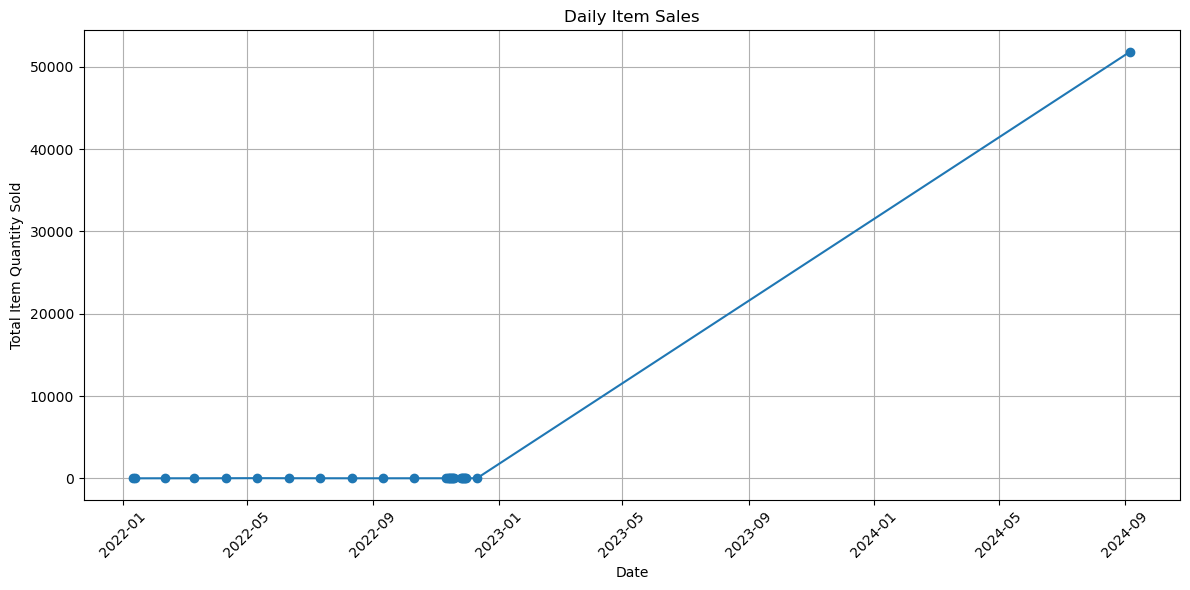

In [46]:
# Aggregate item sales by day
daily_sales = df_cleaned.groupby(df_cleaned.index.date)['itemquantity'].sum()

# Plot the time series of daily item sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Daily Item Sales')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Part 2## 2.	Identify any seasonal patterns or trends in the data.

In [47]:
## 1. Visual Inspection

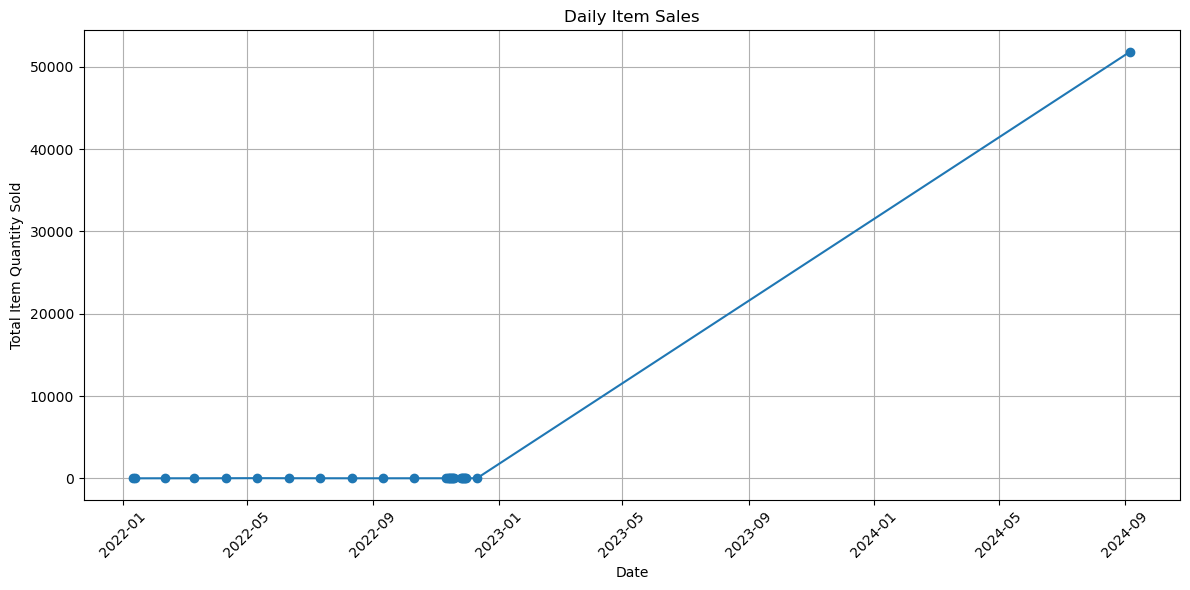

In [48]:
import matplotlib.pyplot as plt

# Plot the daily sales data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Daily Item Sales')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
## Decompose the Time Series

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [51]:
## Set Frequency for DatetimeIndex

In [52]:
# Ensure daily_sales_series is a time series with a DatetimeIndex and a frequency set
daily_sales.index = pd.to_datetime(daily_sales.index)
daily_sales = daily_sales.asfreq('D')  # Set frequency to daily


In [53]:
## Handle Missing Values

In [54]:
# Check for missing values
print(daily_sales.isna().sum())

# Handle missing values by forward filling (or choose another method like interpolation)
daily_sales = daily_sales.ffill().bfill()  # Forward fill and backward fill


943


## Reattempt Decomposition

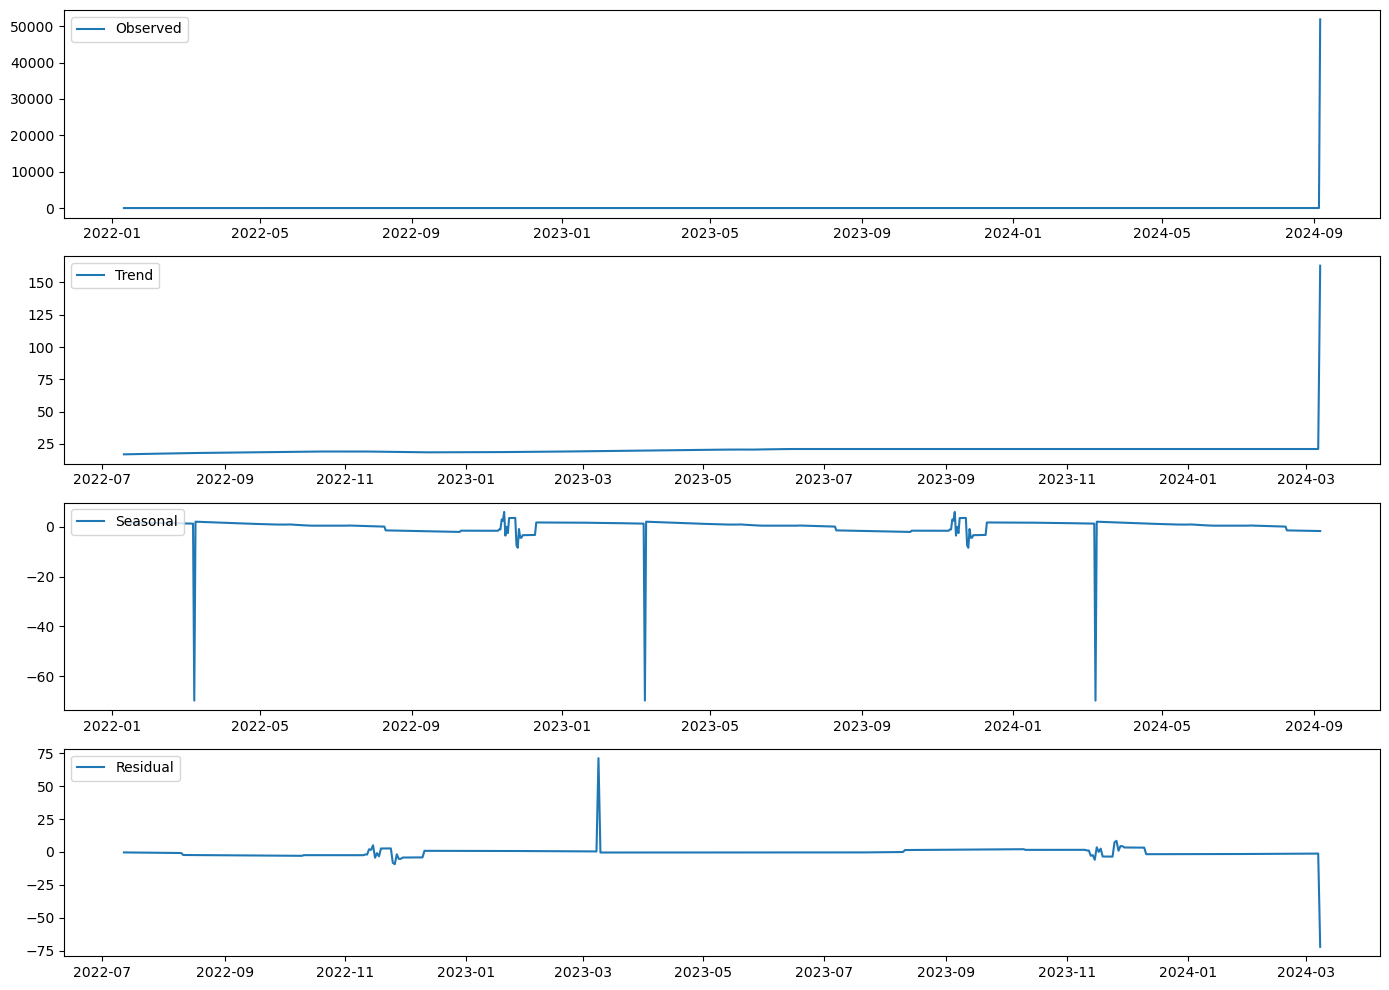

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series with a specified period
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [56]:
#3. Statistical Tests for Seasonality

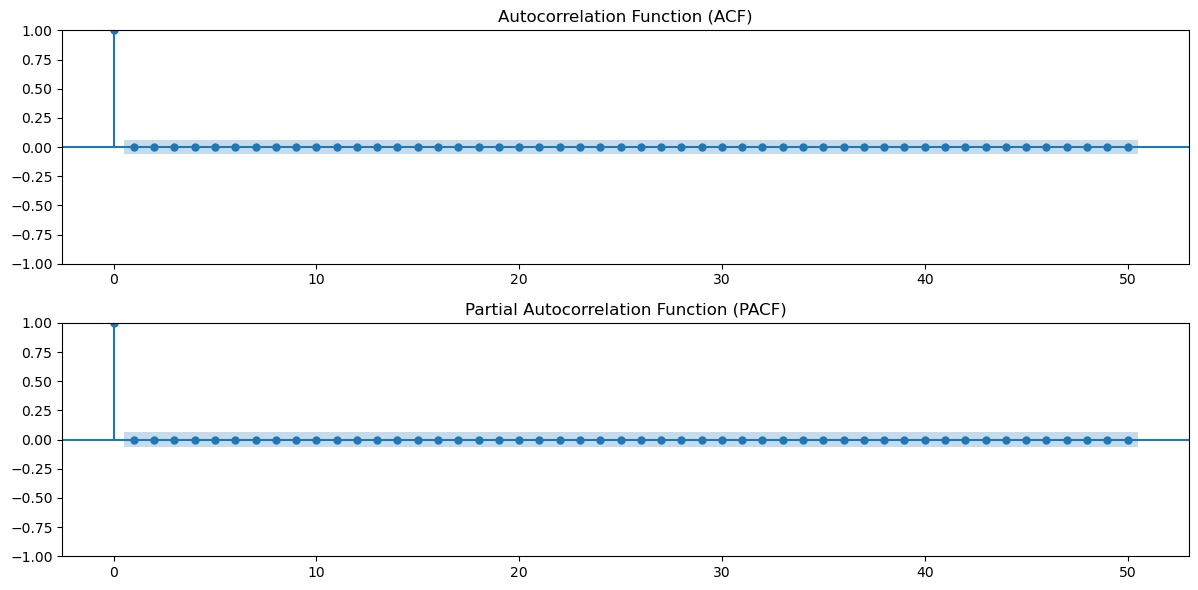

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(daily_sales, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(daily_sales, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [58]:
## 4. Seasonal Subseries Plot

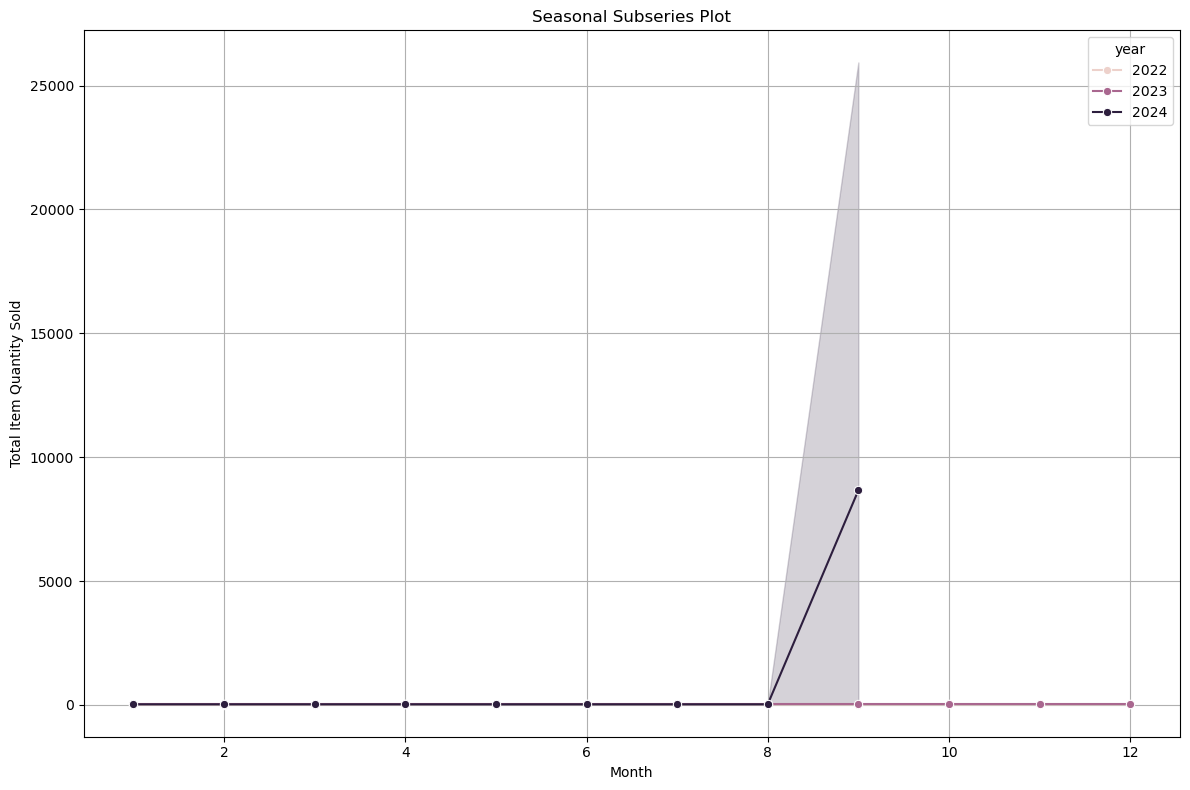

In [59]:
import seaborn as sns

# Create a DataFrame for seasonal subseries plot
df_seasonal = pd.DataFrame({
    'date': daily_sales.index,
    'sales': daily_sales.values,
    'month': daily_sales.index.month,
    'year': daily_sales.index.year
})

# Plot seasonal subseries
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_seasonal, x='month', y='sales', hue='year', marker='o')
plt.title('Seasonal Subseries Plot')
plt.xlabel('Month')
plt.ylabel('Total Item Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
## 5. Fit and Evaluate a Seasonal Model

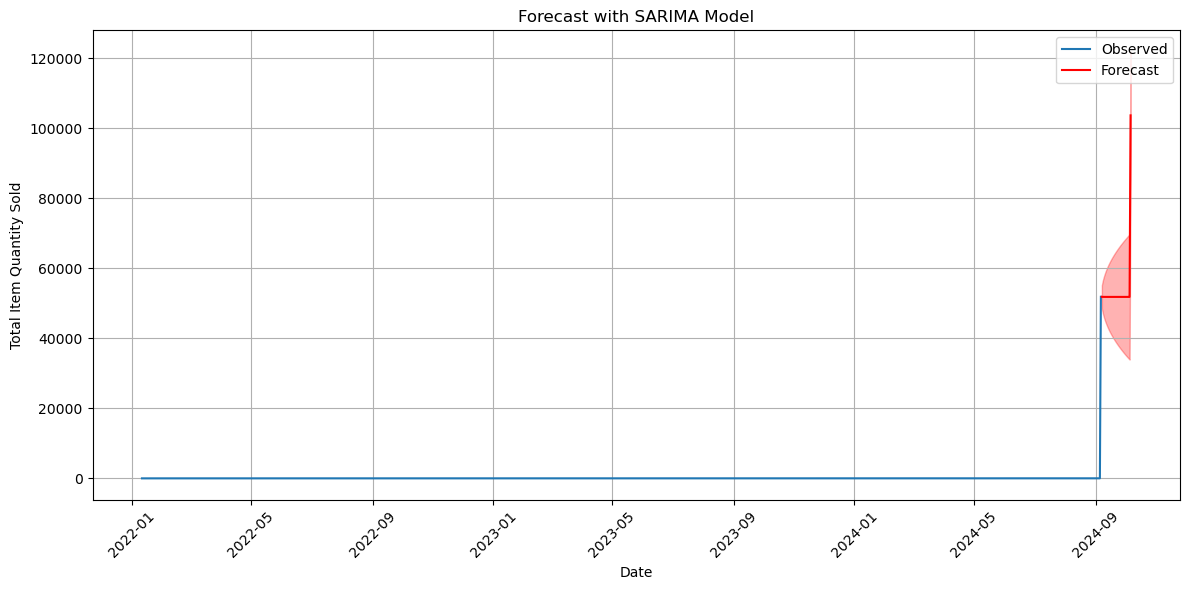

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Simplify the SARIMA model
sarima_model = SARIMAX(daily_sales, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 30))  # Adjust seasonal order based on the period
sarima_result = sarima_model.fit(disp=False)

# Forecasting
forecast = sarima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
confidence_intervals = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], color='red', alpha=0.3)
plt.title('Forecast with SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
## Plotting Moving Averages

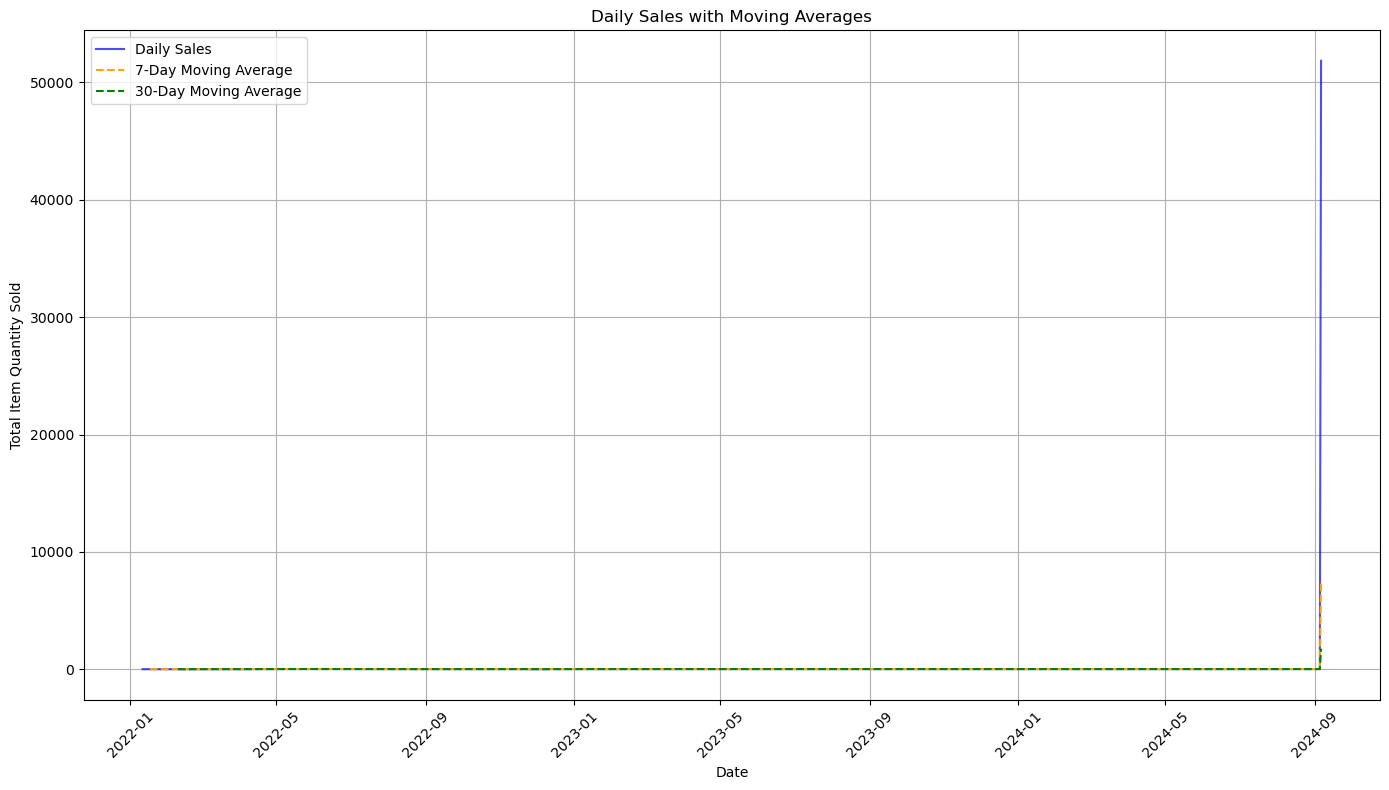

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute 7-day and 30-day moving averages
moving_avg_7 = daily_sales.rolling(window=7, center=False).mean()
moving_avg_30 = daily_sales.rolling(window=30, center=False).mean()

# Plot the time series and moving averages
plt.figure(figsize=(14, 8))
plt.plot(daily_sales, label='Daily Sales', color='blue', alpha=0.7)
plt.plot(moving_avg_7, label='7-Day Moving Average', color='orange', linestyle='--')
plt.plot(moving_avg_30, label='30-Day Moving Average', color='green', linestyle='--')

plt.title('Daily Sales with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Part 3: Forecasting 

In [64]:
## 1.	Split the data into training and test sets.

In [65]:
##  Split the Data

In [66]:
import pandas as pd

# Example time series data
# daily_sales_series = pd.Series(daily_sales.values, index=pd.to_datetime(daily_sales.index))

# Define the split point. For instance, use the last 20% of the data as test set.
split_date = daily_sales.index[-int(len(daily_sales) * 0.2)]

# Split the data into training and test sets
train_set = daily_sales[daily_sales.index <= split_date]
test_set = daily_sales[daily_sales.index > split_date]

print(f"Training set from {train_set.index.min()} to {train_set.index.max()}")
print(f"Test set from {test_set.index.min()} to {test_set.index.max()}")


Training set from 2022-01-11 00:00:00 to 2024-02-26 00:00:00
Test set from 2024-02-27 00:00:00 to 2024-09-06 00:00:00


In [67]:
## Visualize the Split

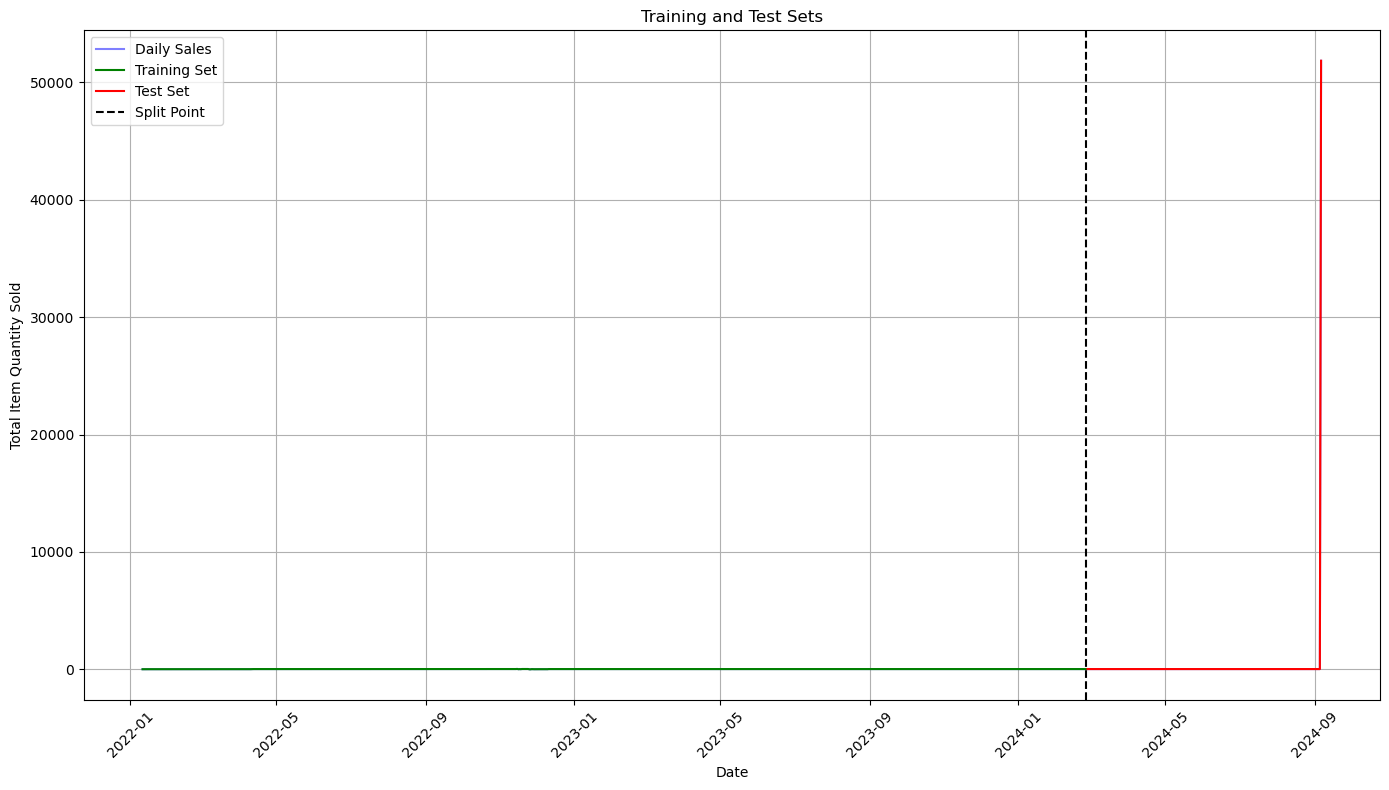

In [68]:
import matplotlib.pyplot as plt

# Plot the training and test sets
plt.figure(figsize=(14, 8))

# Plot the entire time series
plt.plot(daily_sales, label='Daily Sales', color='blue', alpha=0.5)

# Plot the training set
plt.plot(train_set, label='Training Set', color='green')

# Plot the test set
plt.plot(test_set, label='Test Set', color='red')

# Add vertical line to indicate split point
plt.axvline(x=split_date, color='black', linestyle='--', label='Split Point')

# Customize the plot
plt.title('Training and Test Sets')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [69]:
##2.	Select and justify an appropriate forecasting model (e.g., ARIMA, Prophet, etc.).

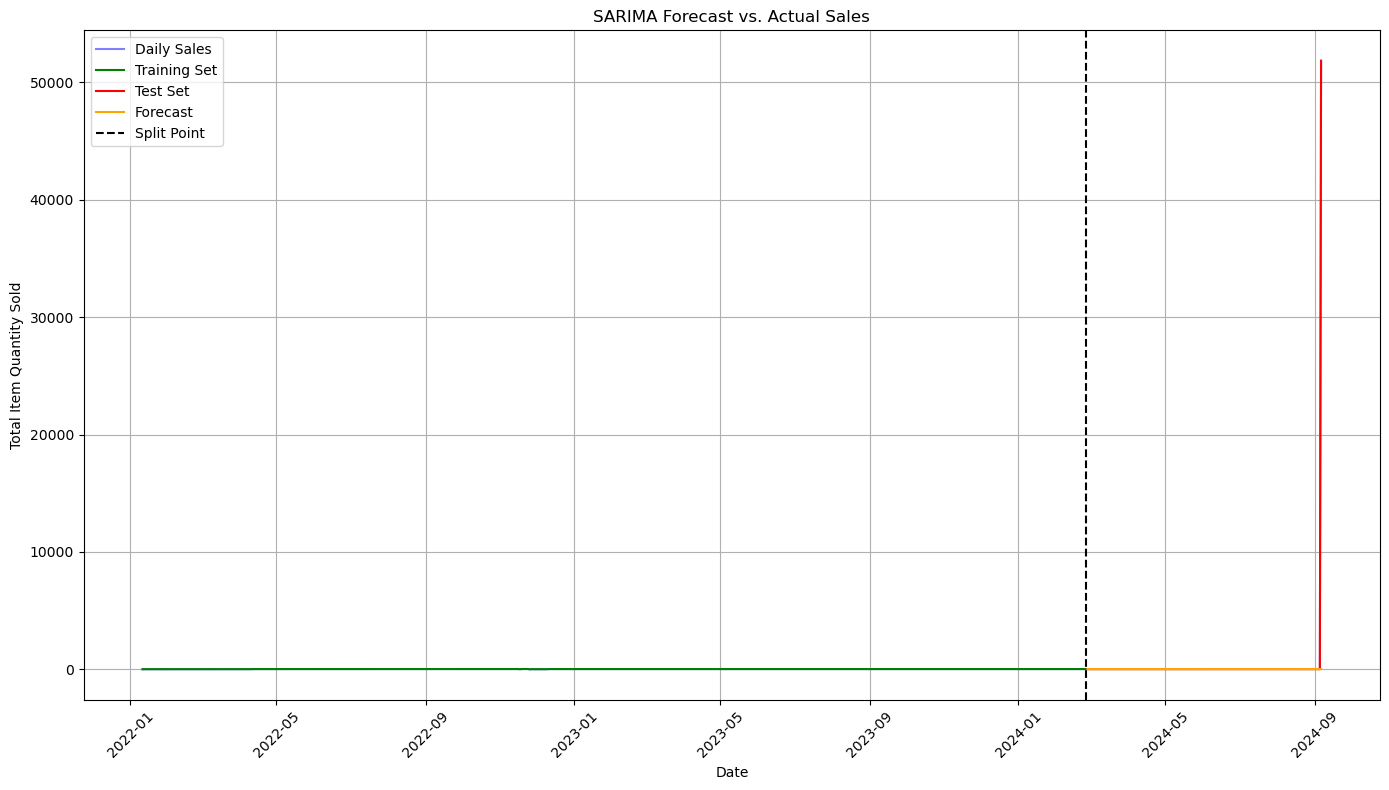

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Fit SARIMA model on the training set
sarima_model = SARIMAX(train_set, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 7))  # Example of a smaller seasonal period
sarima_result = sarima_model.fit()

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test_set))
forecast_index = test_set.index
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
confidence_intervals = forecast.conf_int()

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(daily_sales, label='Daily Sales', color='blue', alpha=0.5)
plt.plot(train_set, label='Training Set', color='green')
plt.plot(test_set, label='Test Set', color='red')
plt.plot(forecast_series, label='Forecast', color='orange')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], color='orange', alpha=0.3)
plt.axvline(x=split_date, color='black', linestyle='--', label='Split Point')
plt.title('SARIMA Forecast vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
# 4.	Evaluate the model on the test data using appropriate metrics (e.g., RMSE, MAE).

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure forecast_series and test_set are aligned and converted to the same format
# Extract the forecasted values and the actual values for comparison
forecast_values = forecast_series.values
actual_values = test_set.values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecast_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 270.03
Root Mean Squared Error (RMSE): 3730.46
Mean Absolute Percentage Error (MAPE): 7.69%


In [77]:
# 5.	Forecast sales for the next 30 days.

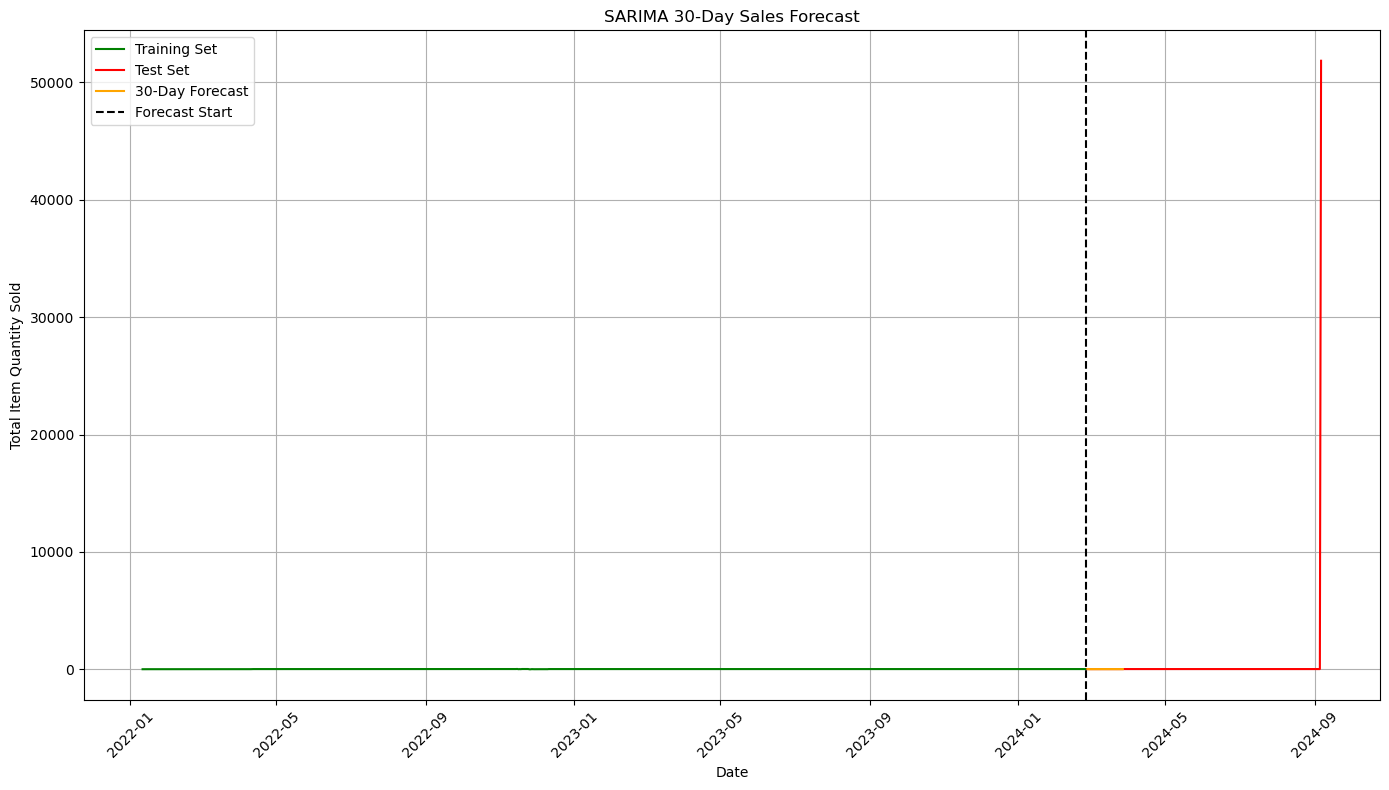

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Ensure your train_set is defined and properly formatted
# Example: train_set = pd.Series([...], index=pd.date_range(start='...', periods=..., freq='D'))

# Fit SARIMA model on the training set
sarima_model = SARIMAX(train_set, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 7))  # Example of a smaller seasonal period
sarima_result = sarima_model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train_set.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
confidence_intervals = forecast.conf_int()

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(train_set, label='Training Set', color='green')
plt.plot(test_set, label='Test Set', color='red')
plt.plot(forecast_series, label='30-Day Forecast', color='orange')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], color='orange', alpha=0.3)
plt.axvline(x=train_set.index[-1], color='black', linestyle='--', label='Forecast Start')
plt.title('SARIMA 30-Day Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Part 4  Machine Learning

In [79]:
# 1.	Create additional features that might be useful for prediction (e.g., day of the week, promotions, holidays).


In [87]:
import holidays

# Sample time series data setup (ensure 'daily_sales' is your actual time series)
start_date = '2024-01-01'
num_periods = 100
date_range = pd.date_range(start=start_date, periods=num_periods, freq='D')
sales_values = np.random.randint(50, 150, size=num_periods)  # Example sales values

daily_sales = pd.Series(sales_values, index=date_range)
daily_sales = daily_sales.to_frame(name='Sales')
daily_sales['Date'] = daily_sales.index

# Add Day of the Week Feature
daily_sales['Day_of_Week'] = daily_sales['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Add Promotion Feature
promotion_dates = ['2024-01-01', '2024-02-14', '2024-12-25']  # Example promotion dates
daily_sales['Promotion'] = daily_sales['Date'].isin(pd.to_datetime(promotion_dates)).astype(int)

# Add Holiday Feature (manual approach if 'holidays' package is not available)
manual_holidays = ['2024-01-01', '2024-02-14', '2024-12-25']  # Example holidays
daily_sales['Holiday'] = daily_sales['Date'].dt.date.isin(pd.to_datetime(manual_holidays)).astype(int)

# Ensure the DataFrame is indexed by Date
daily_sales.set_index('Date', inplace=True)

# Display the DataFrame with new features
print(daily_sales.head())


            Sales  Day_of_Week  Promotion  Holiday
Date                                              
2024-01-01     52            0          1        0
2024-01-02     70            1          0        0
2024-01-03    112            2          0        0
2024-01-04    145            3          0        0
2024-01-05     67            4          0        0


In [84]:
## pip install holidays


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


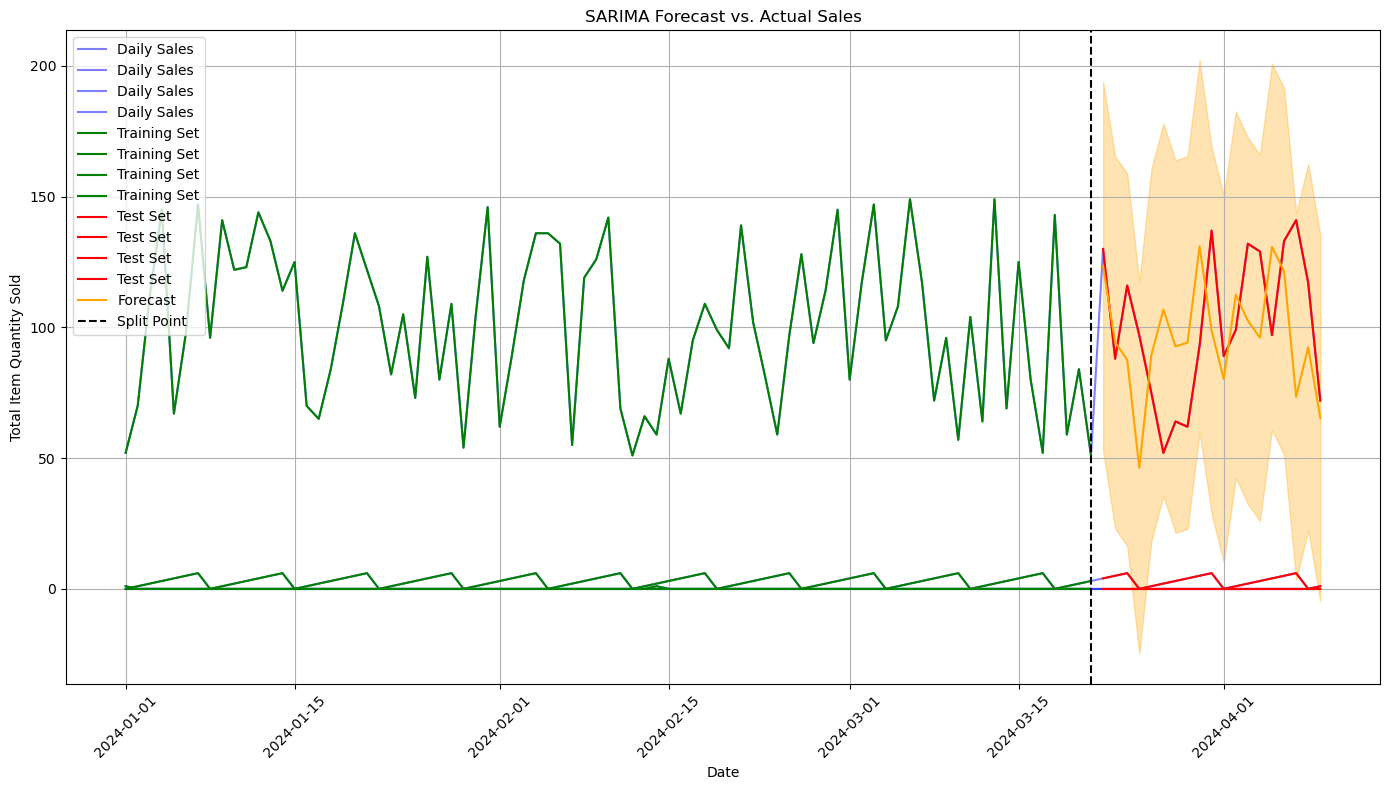

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the exogenous features
exog_features = daily_sales[['Day_of_Week', 'Promotion', 'Holiday']]

# Split the data into training and test sets
split_date = daily_sales.index[-int(len(daily_sales) * 0.2)]
train_set = daily_sales[daily_sales.index <= split_date]
test_set = daily_sales[daily_sales.index > split_date]
exog_train = exog_features.loc[train_set.index]
exog_test = exog_features.loc[test_set.index]

# Fit SARIMA model with exogenous variables
sarima_model = SARIMAX(train_set['Sales'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 30), 
                       exog=exog_train)
sarima_result = sarima_model.fit()

# Forecast with exogenous variables
forecast_steps = len(test_set)
forecast = sarima_result.get_forecast(steps=forecast_steps, exog=exog_test)
forecast_index = test_set.index
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
confidence_intervals = forecast.conf_int()

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(daily_sales, label='Daily Sales', color='blue', alpha=0.5)
plt.plot(train_set, label='Training Set', color='green')
plt.plot(test_set, label='Test Set', color='red')
plt.plot(forecast_series, label='Forecast', color='orange')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], color='orange', alpha=0.3)
plt.axvline(x=split_date, color='black', linestyle='--', label='Split Point')
plt.title('SARIMA Forecast vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [97]:
## 2.	Split the data into training and test sets.

Training set from 2024-01-01 00:00:00 to 2024-03-21 00:00:00
Test set from 2024-03-22 00:00:00 to 2024-04-09 00:00:00


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


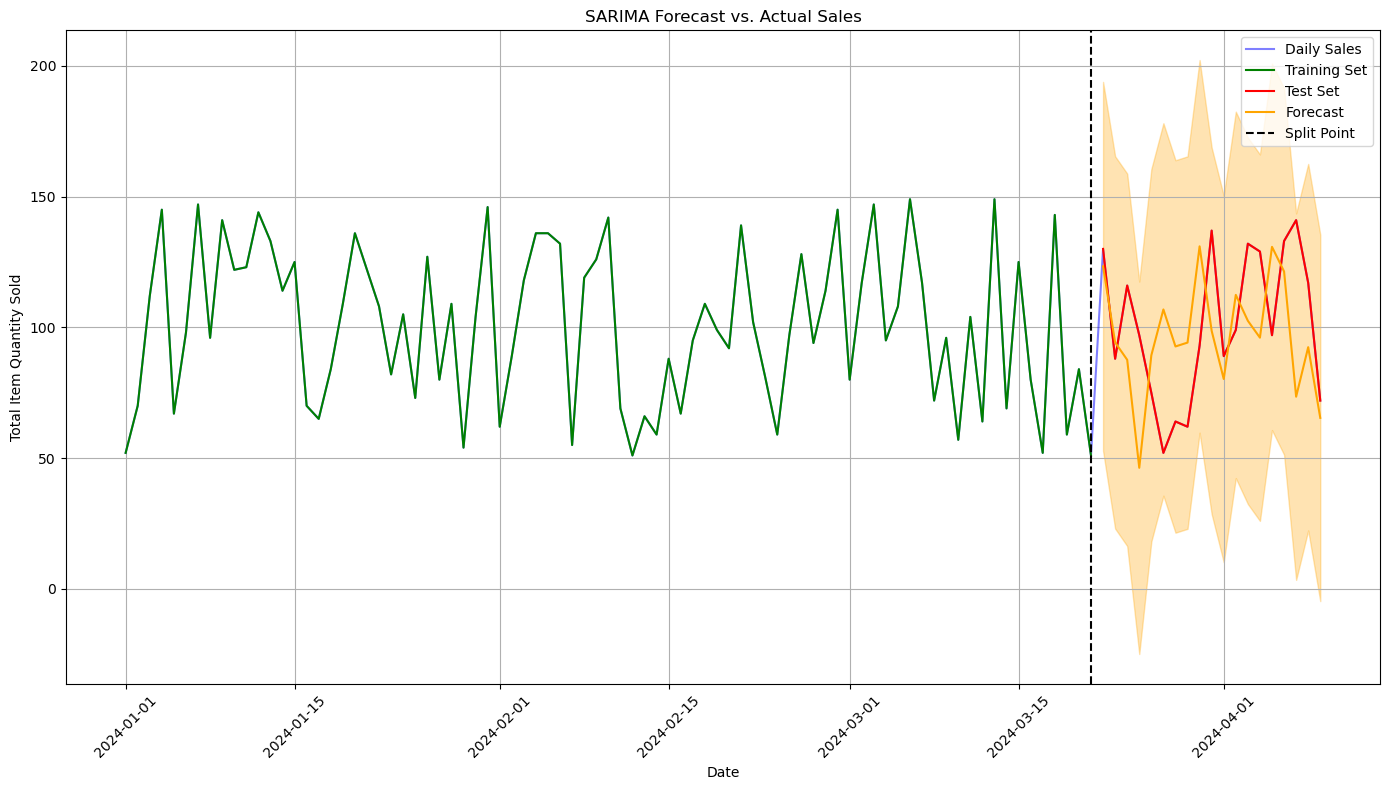

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example DataFrame setup (Make sure `daily_sales` has a DateTime index)
# daily_sales = pd.DataFrame({
#     'Sales': [...],
#     'Day_of_Week': [...],
#     'Promotion': [...],
#     'Holiday': [...]
# }, index=pd.date_range(start='...', periods=..., freq='D'))

# Ensure 'daily_sales' has a DateTime index
daily_sales.index = pd.to_datetime(daily_sales.index)

# Define the exogenous features
exog_features = daily_sales[['Day_of_Week', 'Promotion', 'Holiday']]

# Define the split point (last 20% of the data as test set)
split_date = daily_sales.index[-int(len(daily_sales) * 0.2)]

# Split the data into training and test sets
train_set = daily_sales[daily_sales.index <= split_date]
test_set = daily_sales[daily_sales.index > split_date]
exog_train = exog_features.loc[train_set.index]
exog_test = exog_features.loc[test_set.index]

print(f"Training set from {train_set.index.min()} to {train_set.index.max()}")
print(f"Test set from {test_set.index.min()} to {test_set.index.max()}")

# Fit SARIMA model with exogenous variables
sarima_model = SARIMAX(train_set['Sales'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 30), 
                       exog=exog_train)
sarima_result = sarima_model.fit()

# Forecast with exogenous variables
forecast_steps = len(test_set)
forecast = sarima_result.get_forecast(steps=forecast_steps, exog=exog_test)
forecast_index = test_set.index
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
confidence_intervals = forecast.conf_int()

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(daily_sales['Sales'], label='Daily Sales', color='blue', alpha=0.5)
plt.plot(train_set['Sales'], label='Training Set', color='green')
plt.plot(test_set['Sales'], label='Test Set', color='red')
plt.plot(forecast_series, label='Forecast', color='orange')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], color='orange', alpha=0.3)
plt.axvline(x=split_date, color='black', linestyle='--', label='Split Point')
plt.title('SARIMA Forecast vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [103]:
## 3.	Select and justify an appropriate machine learning model (e.g., Linear Regression, Random Forest, XGBoost).
## 4.	Train the model on the training data.

Mean Absolute Error (MAE): 22.44
Root Mean Squared Error (RMSE): 26.34


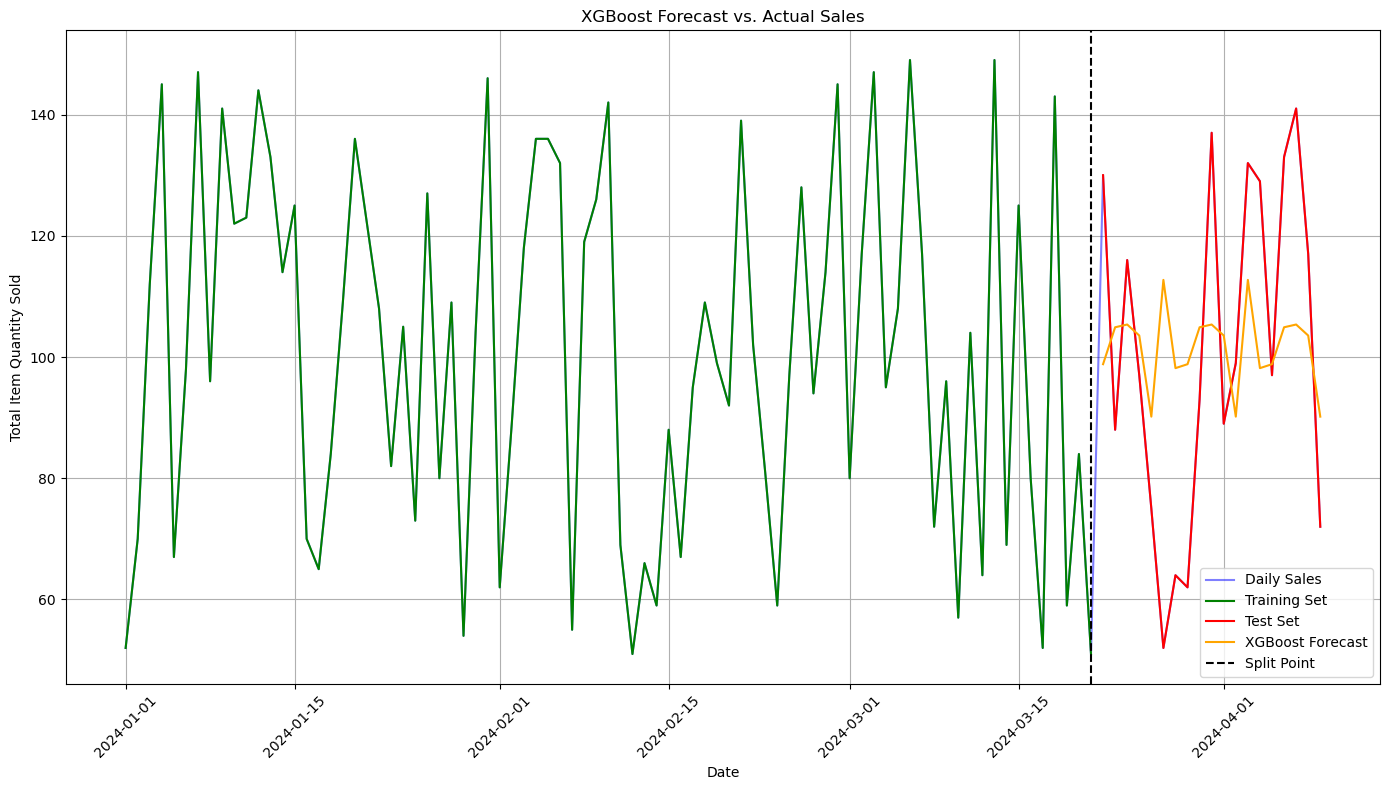

In [98]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare the features and target variable
X_train = exog_train
X_test = exog_test
y_train = train_set['Sales']
y_test = test_set['Sales']

# Create and fit the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(daily_sales['Sales'], label='Daily Sales', color='blue', alpha=0.5)
plt.plot(train_set['Sales'], label='Training Set', color='green')
plt.plot(test_set['Sales'], label='Test Set', color='red')
plt.plot(test_set.index, y_pred, label='XGBoost Forecast', color='orange')
plt.axvline(x=split_date, color='black', linestyle='--', label='Split Point')
plt.title('XGBoost Forecast vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
## 5.	Evaluate the model on the test data using appropriate metrics (e.g., R², RMSE).

In [104]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 22.44
Root Mean Squared Error (RMSE): 26.34
R² Score: 0.07


In [106]:
## 6.	Interpret the model results and identify the most important features.

       Feature  Importance
1    Promotion    0.804693
0  Day_of_Week    0.195307
2      Holiday    0.000000


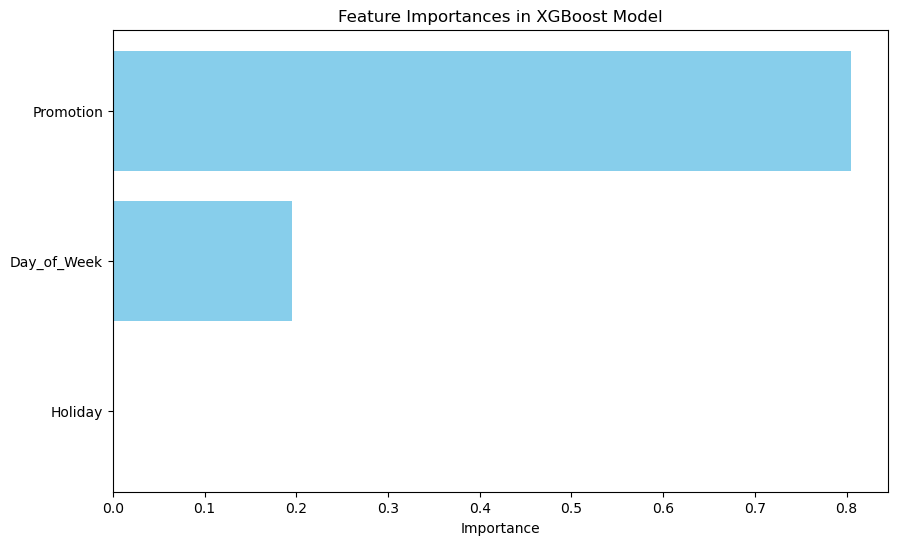

In [107]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assume xgboost_model is your trained XGBoost model
importances = xgboost_model.feature_importances_

# Create a DataFrame to display feature importances
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()
plt.show()
